In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
import numpy as np
import os

In [6]:
# Load data
landmark = np.load('landmark_train_right/landmark.npy')
label = np.load('landmark_train_right/label.npy')

# Convert label to category
label = tf.keras.utils.to_categorical(label, num_classes=28)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(landmark, label, test_size=0.2, random_state=23)

In [7]:
print(X_train.shape)
print(y_train.shape)

(49368, 21, 2)
(49368, 28)


In [8]:
# Define the DNN model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(28, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Define early stopping, learning rate reduction callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

In [10]:
# Train the model with early stopping
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=[early_stopping, reduce_lr])

Epoch 1/100
1543/1543 [==============================] - 6s 3ms/step - loss: 0.3652 - accuracy: 0.9052 - val_loss: 0.1409 - val_accuracy: 0.9575 - lr: 0.0010
Epoch 2/100
1543/1543 [==============================] - 6s 4ms/step - loss: 0.1380 - accuracy: 0.9583 - val_loss: 0.0924 - val_accuracy: 0.9743 - lr: 0.0010
Epoch 3/100
1543/1543 [==============================] - 6s 4ms/step - loss: 0.1121 - accuracy: 0.9650 - val_loss: 0.0829 - val_accuracy: 0.9782 - lr: 0.0010
Epoch 4/100
1543/1543 [==============================] - 6s 4ms/step - loss: 0.1005 - accuracy: 0.9688 - val_loss: 0.0744 - val_accuracy: 0.9805 - lr: 0.0010
Epoch 5/100
1543/1543 [==============================] - 6s 4ms/step - loss: 0.0902 - accuracy: 0.9719 - val_loss: 0.0693 - val_accuracy: 0.9794 - lr: 0.0010
Epoch 6/100
1543/1543 [==============================] - 6s 4ms/step - loss: 0.0842 - accuracy: 0.9732 - val_loss: 0.0612 - val_accuracy: 0.9836 - lr: 0.0010
Epoch 7/100
1543/1543 [=============================

In [11]:
# Save the model
model.save('model-right.h5')

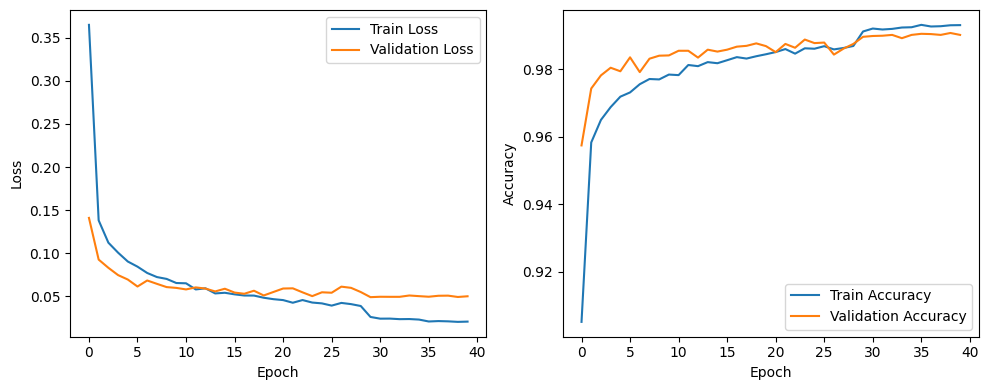

In [12]:
# Plot the loss and accuracy curves
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

386/386 [==============================] - 0s 869us/step


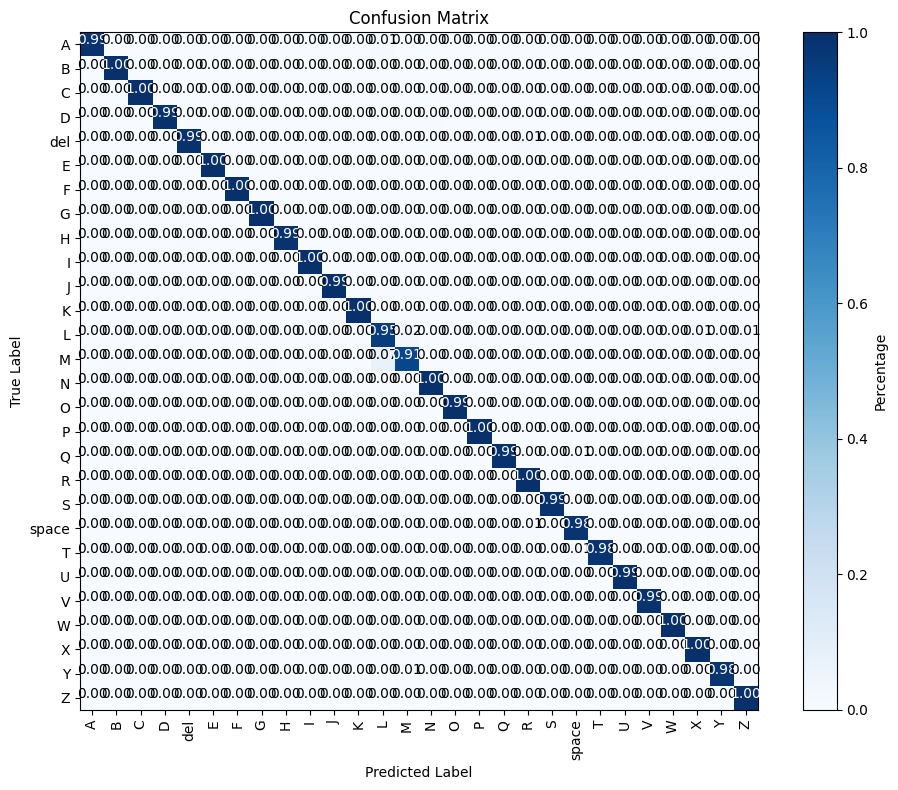

In [13]:
# Assuming you have predictions and true labels
y_pred = model.predict(X_test)  # Example predictions
y_true = np.argmax(y_test, axis=1)  # True labels (assuming one-hot encoded)

# Compute the confusion matrix
cm = confusion_matrix(y_true, np.argmax(y_pred, axis=1))

# Define class labels
class_labels = os.listdir('asl_alphabet_train_right')

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar(label='Percentage')
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=90)
plt.yticks(tick_marks, class_labels)

# Add labels to each cell
thresh = cm_normalized.max() / 2.
for i in range(cm_normalized.shape[0]):
    for j in range(cm_normalized.shape[1]):
        plt.text(j, i, '{:.2f}'.format(cm_normalized[i, j]),
                 horizontalalignment="center",
                 color="white" if cm_normalized[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()